# COMP7404 - Assignment 4

## Part A: Conceptual Questions

Solve the following questions by hand. You can write your answer on a seperate paper (submit as *.pdf) or type it below and submit together with Part B as a single *.ipynb file.


### A1
Consider a Perceptron with 2 inputs and 1 output. Let the weights of the Perceptron be $w_1 = 1$ and $w_2 = 1$ and let the bias be $w_0 = -1.5$. Calculate the output of the following inputs:(0, 0), (1, 0), (0, 1), (1, 1)



```
# This is formatted as code
```

(0,0): z = w0x0 + w1x1 + w2x2 = -1.5(1) + 1(0) + 1(0) = -1.5. Output is -1.

(1,0): z = w0x0 + w1x1 + w2x2 = -1.5(1) + 1(1) + 1(0) = -0.5. Output is -1.

(0,1): z = w0x0 + w1x1 + w2x2 = -1.5(1) + 1(0) + 1(1) = -0.5. Output is -1.

(1,1): z = w0x0 + w1x1 + w2x2 = -1.5(1) + 1(1) + 1(1) = 0.5. Output is 1.



###A2
Define a perceptron for the following logical functions: AND, NOT, NAND, NOR


*Your answer here*

AND: x1+x2-1
NOT: 2x1+2x2–1
NAND: -x1-x2+2
NOR: -x1-x2+1

###A3
The parity problem returns 1 if the number of inputs that are 1 is even, and 0 otherwise. Can a perceptron learn this problem for 3 inputs? 


*Your answer here*

No, we cannot classify it using a single neuron because it will act as a XOR gate. In a single-layer perceptron, it is not possible to implement the XOR operation.

###A4
Suppose that the following are a set of point in two classes:

*   Class1: $(1, 1), (1, 2), (2, 1)$
*   Class2: $(0, 0), (1, 0), (0, 1)$

Plot them and find the optimal separating line. What are the support vectors, and what is the meaning?


*Your answer here*

###A5
Suppose that the probability of five events are $P(first) = 0.5, P(second) = P(third) = P(fourth) = P(fifth) = 0.125$. Calculate the entropy and write down in words what this means. 


*Your answer here*

###A6
Design a decision tree that computes the logical AND function. How does it compare to the Perceptron solution?

*Your answer here*

###A7
Turn the following politically incorrect data into a decision tree to classify which attributes make a person attractive, and then extract the rules. Use the Gini Impurity.

| Height  | Hair  | Eyes  | Attractive?  |
|:-:|:-:|:-:|:-:|
| Small  | Blonde  | Brown  | No  |
| Tall  | Dark  | Brown  | No  |
| Tall  | Blonde  | Blue  | Yes  |
| Tall  | Dark  | Blue  | No  |
| Small  | Dark  | Blue  | No  |
| Tall  | Red  | Blue  | Yes  |
| Tall  | Blonde  | Brown  | No  |
| Small  | Blonde  | Blue  | Yes  |


*Your answer here*

###A8
Suppose we collect data for a group of students in a postgraduate machine learning class with features $x_1$ = hours studies, $x_2$ = undergraduate GPA and label $y$ = receive an A. We fit a logistic regression and produce estimated weights as follows: $w_0 = -6$, $w_1 = 0.05$, $w_2 = 1$.

1.  Estimate the probability that a student who studies for 40h and has an undergraduate GPA of 3.5 gets an A in the class
2.  How many hours would the student in part 1. need to study to have a 50% chance of getting an A in the class?

*Your answer here*

###A9
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e., K=1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

*Your answer here*

### A10

Suppose the features in your training set have very different scales. Which algorithms discussed in class might suffer from this, and how? What can you do about it?


*Your answer here*

### A11


If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak and how?

*Your answer here*

### A12

What is the benefit of out-of-bag evaluation?

*Your answer here*

### A13

What is the difference between hard and soft voting classifiers?

*Your answer here*

## Part B: Applied Questions

Solve the following questions by implementing solutions in code.

###B1
Consider the following Perceptron code.

In [4]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
import pandas as pd

data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


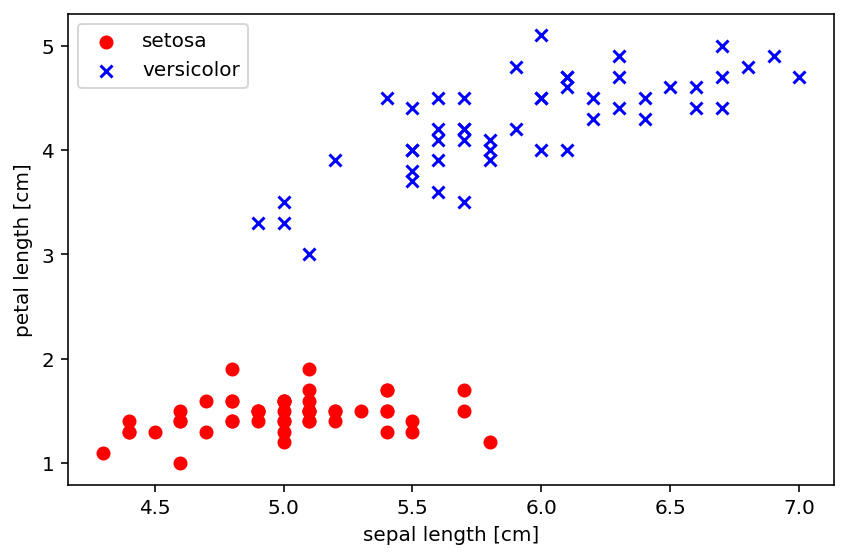

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn = ppn.fit(X, y)

In [8]:
from matplotlib.colors import ListedColormap

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

As shown in function plot_decision_regions, the decision regions can be visualized by dense sampling via meshgrid. However, if the grid resolution is not enough, as artificially set below, the boundary will appear inaccurate.

Implement function plot_decision_boundary below to analytically compute and plot the decision boundary.

In [9]:
def plot_decision_boundary(X, y, classifier):    
    
    # replace the two lines below with your code
    w = classifier.w_ 
    x1_interval = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    x2_interval = [-(w[0] + w[1]*x1_interval[0]) / w[2], -(w[0] + w[1]*x1_interval[1]) / w[2]]
    
    plt.plot(x1_interval, x2_interval, color='green', linewidth=4, label='boundary')

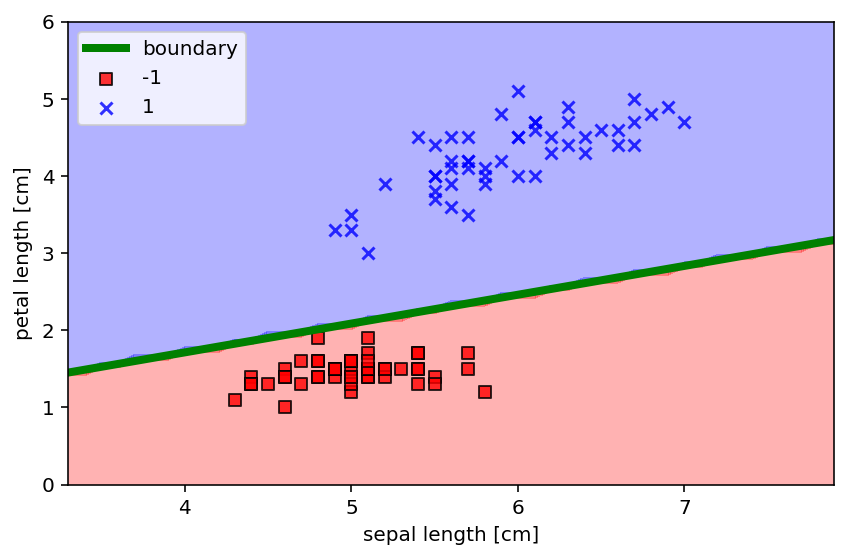

In [10]:
low_res = 0.1 # intentional for this exercise
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

###B2

In class we applied different scikit-learn classifers for the Iris data set.

In this question, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)


(1797, 64)
(1797,)


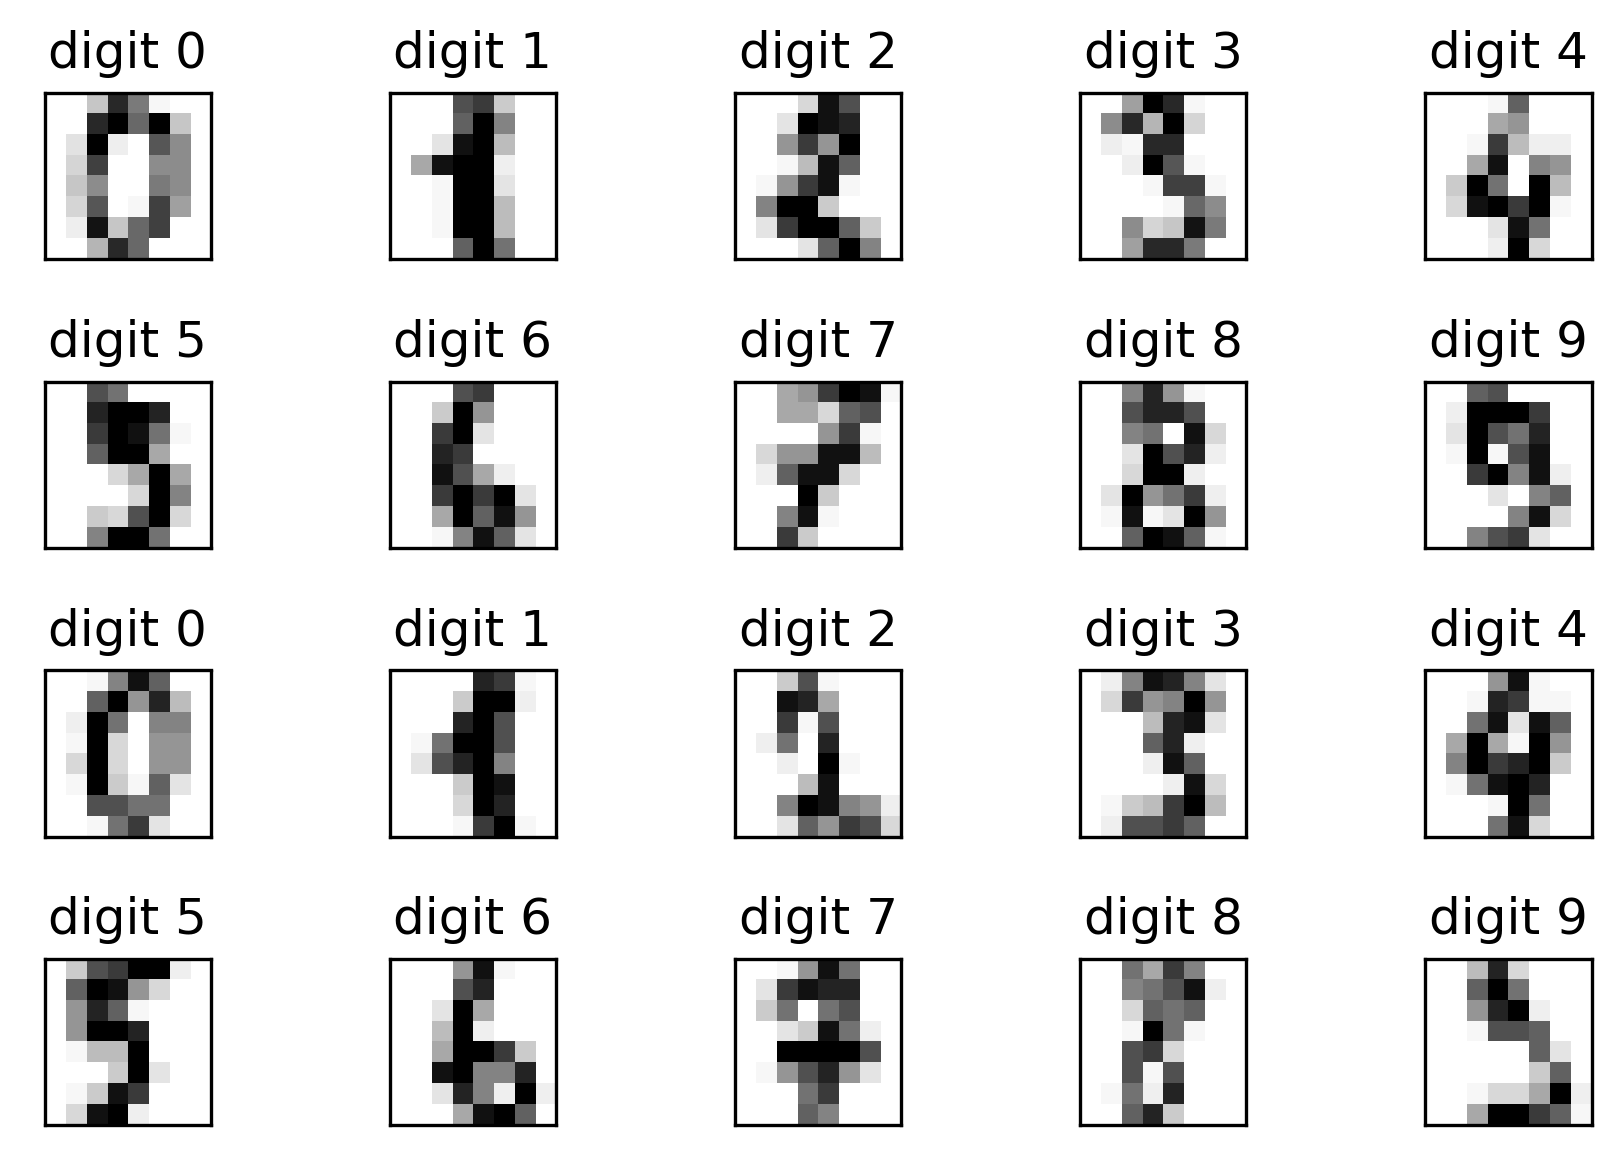

In [42]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Date Preprocessing

Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [43]:
#Your code comes here
# Import datasets, classifiers and performance metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, random_state=1, stratify=digits.target
)

# Feature Scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



Classifier #1 Perceptron

In [44]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.674


Classifier #2 Logistic Regression

In [45]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))


Accuracy: 0.809


Classifier #3 SVM

In [50]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))


Accuracy: 0.835


Classifier #4 Decision Tree

In [47]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train_std, y_train)
y_pred = tree.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))


Accuracy: 0.204


Classifer #5 Random Forest

In [48]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train_std, y_train)
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.248


Classifier #6 KNN

In [49]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.812


**We can see that support vector machine performs the best and decision tree performs the worst. In this dataset, there are more than 60 features and 10 labels. Also, the sample size is not very large. Decision tree cannot work well since it is prone to errors in classification problem with many classes and relatively small number of training samples. On the other hand, support vector machine works well because it is effective in high dimensional spaces.**

###B3
Build a spam classifier:



*   Download examples of spam and ham from Apache SpamAssassin’s public datasets.
*   Unzip the datasets and familiarize yourself with the data format.
*   Split the datasets into a training set and a test set.
*   Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
*   You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

*   Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

In [58]:
#Your answer here
import os

DATASETS_DIR = 'datasets'
MODELS_DIR = 'models'
TAR_DIR = os.path.join(DATASETS_DIR, 'tar')

SPAM_URL = 'https://spamassassin.apache.org/old/publiccorpus/20050311_spam_2.tar.bz2'
EASY_HAM_URL = 'https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham_2.tar.bz2'
HARD_HAM_URL = 'https://spamassassin.apache.org/old/publiccorpus/20030228_hard_ham.tar.bz2'

from urllib.request import urlretrieve
import tarfile
import shutil

def download_dataset(url):
    """download and unzip data from a url into the specified path"""
    
    # create directory if it doesn't exist
    if not os.path.isdir(TAR_DIR):
        os.makedirs(TAR_DIR)
    
    filename = url.rsplit('/', 1)[-1]
    tarpath = os.path.join(TAR_DIR, filename)
    
    # download the tar file if it doesn't exist
    try:
        tarfile.open(tarpath)
    except:
        urlretrieve(url, tarpath)
    
    with tarfile.open(tarpath) as tar:
        dirname = os.path.join(DATASETS_DIR, tar.getnames()[0])
        if os.path.isdir(dirname):
            shutil.rmtree(dirname)
        tar.extractall(path=DATASETS_DIR)
        
        cmds_path = os.path.join(dirname, 'cmds')
        if os.path.isfile(cmds_path):
            os.remove(cmds_path)
    
    return dirname

# download the data
spam_dir = download_dataset(SPAM_URL)
easy_ham_dir = download_dataset(EASY_HAM_URL)
hard_ham_dir = download_dataset(HARD_HAM_URL)

import numpy as np
import glob

def load_dataset(dirpath):
    """load emails from the specified directory"""
    
    files = []
    filepaths = glob.glob(dirpath + '/*')
    for path in filepaths:
        with open(path, 'rb') as f:
            byte_content = f.read()
            str_content = byte_content.decode('utf-8', errors='ignore')
            files.append(str_content)
    return files

# load the datasets
spam = load_dataset(spam_dir)
easy_ham = load_dataset(easy_ham_dir)
hard_ham = load_dataset(hard_ham_dir)

import sklearn.utils

# create the full dataset
X = spam + easy_ham + hard_ham
# spam = 1, ham = 0
y = np.concatenate((np.ones(len(spam)), np.zeros(len(easy_ham) + len(hard_ham))))

# shuffle the dataset
X, y = sklearn.utils.shuffle(X, y, random_state=42)

from sklearn.model_selection import train_test_split

# split the data into stratified training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=1)

def remove_header(email):
    """remove the header from an email"""
    return email[email.index('\n\n'):]

import re 

def is_url(s):
    url = re.match("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|"
                     "[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", s)
    return url is not None

def convert_url_to_word(words):
    """convert all urls in the list to the word 'URL'"""
    for i, word in enumerate(words):
        if is_url(word):
            words[i] = 'URL'
    return words

def convert_num_to_word(words):
    """convert all numbers in the list to the word 'NUM'"""
    for i, word in enumerate(words):
        if word.isdigit():
            words[i] = 'NUM'
    return words

def remove_punctuation(email):
    new_email = ""
    for c in email:
        if c.isalnum() or c.isspace():
            new_email += c
    return new_email

from sklearn.base import BaseEstimator, TransformerMixin

class CleanEmails(BaseEstimator, TransformerMixin):
    def __init__(self, no_header=True, to_lowercase=True, url_to_word=True, num_to_word=True,
                 remove_punc=True):
        self.no_header = no_header
        self.to_lowercase = to_lowercase
        self.url_to_word = url_to_word
        self.num_to_word = num_to_word
        self.remove_punc = remove_punc
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_cleaned = []
        for email in X:
            if self.no_header:
                email = remove_header(email)
            if self.to_lowercase:
                email = email.lower()
            
            email_words = email.split()
            if self.url_to_word:
                email_words = convert_url_to_word(email_words)
            if self.num_to_word:
                email_words = convert_num_to_word(email_words)
            email = ' '.join(email_words)
            if self.remove_punc:
                email = remove_punctuation(email)
            X_cleaned.append(email)
        return X_cleaned

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# full preparation pipeline
prepare_pipeline = Pipeline([
    ('clean_email', CleanEmails()),
    ('bag_of_words', CountVectorizer())
])
# prepare the training data
X_train_prepared = prepare_pipeline.fit_transform(X_train)
print(X_train_prepared.shape)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

def eval_confusion(y_pred, y_true=y_train):
    recall = recall_score(y_true, y_pred)
    return {'recall': recall}


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# classification models
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
forest_clf = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
knn_clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
svm_clf = SVC(kernel='linear', C=1, random_state=1)

classifiers = {
    'Decision Tree': tree_clf,
    'Random Forest': forest_clf,
    'KNN': knn_clf,
    'SVM': svm_clf,
}

from sklearn.model_selection import cross_val_predict

# make predictions using each model
y_preds = {}
for clf_name, clf in classifiers.items():
    y_preds[clf_name] = cross_val_predict(clf, X_train_prepared, y_train, cv=3)

# evaluate each classifier's accuracy
for clf_name, y_pred in y_preds.items():
    conf = eval_confusion(y_pred)
    print("{}:".format(clf_name))
    print("accuracy: {}".format(accuracy_score(y_train, y_pred)))
    print("recall: {}".format(conf['recall']))
    print()

(2436, 95712)
Decision Tree:
accuracy: 0.8977832512315271
recall: 0.8879928315412187

Random Forest:
accuracy: 0.9638752052545156
recall: 0.96415770609319

KNN:
accuracy: 0.8891625615763546
recall: 0.8745519713261649

SVM:
accuracy: 0.9626436781609196
recall: 0.9614695340501792

